# Image란?

## Image는 width X height X channel 의 pixels로 이루어진 matrix

- width: 너비로 이미지의 가로 길이를 의미한다.
- height: 높이로 이미지의 세로 길이를 의미한다.

- pixel: image가 가지고 있는 값으로 width X height 개수만큼 존재한다. image를 표현하는 bit방식에 따라 값의 범위가 달라진다.

- 일반적인 Image는 unsigned integer 8bit로 표현
    - 0 ~ 255 로 표현
- bit수가 높아질 수록 표현할 수 있는 색의 범위가 증가한다.   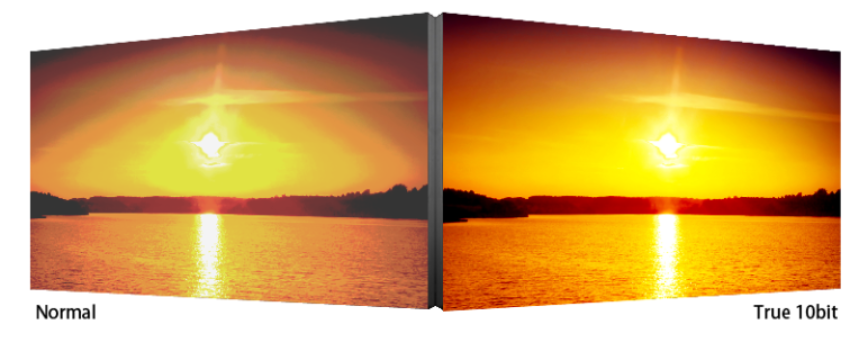

# Open CV 개요
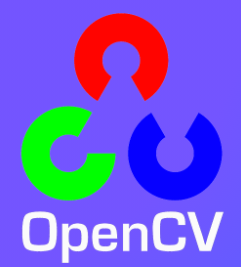

- https://opencv.org/
- 튜토리얼: https://docs.opencv.org/master/
- Open Source Computer Vision Library로 실시간 computer vision을 목적으로 개발됨
- Intel에서 개발하다가 open source화 됨
- Cross Platform이기 때문에 Windows, Mac, Linux, OS에 상관없이 동작 가능
- C/C++로 개발 되었으나 Python, JAVA, MATLAB의 개발 환경도 지원한다.
- 실시간에 초점을 맞추고 나온 library이기 때문에 mobile camera나 로봇 등에 recognition module로 붙여 영상처리에 활용된다.

# OpenCV 설치

- `!pip install opencv-contrib-python`
- `!pip install opencv-python`

In [1]:
!pip install opencv-contrib-python

                                              0.0/44.9 MB ? eta -:--:--
     ---                                     3.6/44.9 MB 114.3 MB/s eta 0:00:01
     ------                                   7.8/44.9 MB 99.2 MB/s eta 0:00:01
     ----------                             12.7/44.9 MB 108.8 MB/s eta 0:00:01
     --------------                         17.4/44.9 MB 110.0 MB/s eta 0:00:01
     ------------------                     22.0/44.9 MB 110.0 MB/s eta 0:00:01
     ----------------------                 26.5/44.9 MB 108.8 MB/s eta 0:00:01
     --------------------------             31.3/44.9 MB 108.8 MB/s eta 0:00:01
     ------------------------------         36.2/44.9 MB 108.8 MB/s eta 0:00:01
     ----------------------------------     40.9/44.9 MB 108.8 MB/s eta 0:00:01
     --------------------------------------  44.9/44.9 MB 93.0 MB/s eta 0:00:01
     --------------------------------------  44.9/44.9 MB 93.0 MB/s eta 0:00:01
     --------------------------------------  44.

In [2]:
!pip install opencv-python

# 이미지 읽기
- **`imread(filename [, flag]) : ndarray`**
    - 이미지를 읽는다.
        
    - filename: 읽어들일 이미지 파일경로
    - flag: 읽기 모드
        - cv2.IMREAD_XXXXX 상수를 이용한다.
        - IMREAD_COLOR가 기본(BGR 모드)
            - matplotlib에서 출력시 rgb 모드로 변환해야 한다.

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [10]:
lenna = cv2.imread("images/lenna.bmp")
print(type(lenna), lenna.shape)  #(height, width, channel)

<class 'numpy.ndarray'> (512, 512, 3)


In [11]:
# 이미지 출력
cv2.imshow("frame", lenna)
cv2.waitKey()   #키보드 입력을 기다리는 함수->입력전까지 IO blocking이 됨.(waitKey(밀리초))
                # 밀리초(1/1000)를 생략, 0을 설정-> 입력될때까지 대기.
cv2.destroyAllWindows()  # 이미지 출력 창(window)를 모두 종료
cv2.waitKey(1)

-1

### matplotlib 으로 출력
- jupyter notebook 내에 출력이 가능

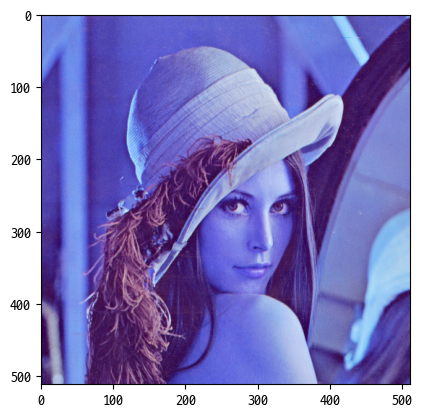

In [12]:
plt.imshow(lenna)
plt.show()

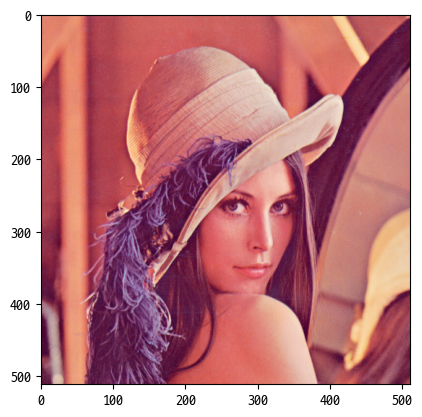

In [13]:
plt.imshow(lenna[:,:,::-1])
plt.show()

## 색공간 변환
- **`cv2.cvtColor(src, code)`**
    - image 의 color space를 변환한다. 
    - src: 변환시킬 이미지 (ndarray)
    - code
        - 변환시킬 색공간 타입 지정
        - cv2.COLOR_XXX**2**YYY 형태의 상수 지정(XXX를YYY로 변환)
            - cv2.COLOR_XXX2YYY 형태의 상수 지정(XXX를YYY로 변환)
            - cv2.COLOR_BGR2GRAY / cv2.COLOR_GRAY2BGR (BGR <-> GRAY)
            - cv2.COLOR_BGR2RGB  / cv2.COLOR_RGB2BGR  (BGR <-> RGB)
            - cv2.COLOR_BGR2HSV  / cv2.COLOR_HSV2BGR  (BGR <-> HSV)

> ### HSV
> - Hue: 색상, 색의 종류
> - Saturation: 채도. 색의 선명도
> - Value : 명도. 밝기

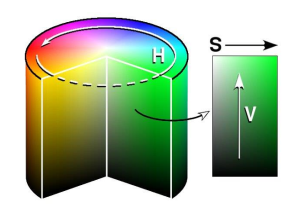
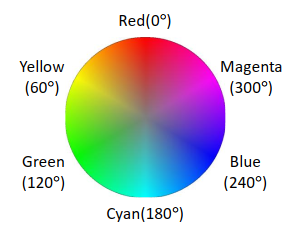

In [14]:
# lenna: BGR -> RGB
lenna_rgb = cv2.cvtColor(lenna, cv2.COLOR_BGR2RGB)

cv2.imshow("frame", lenna_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

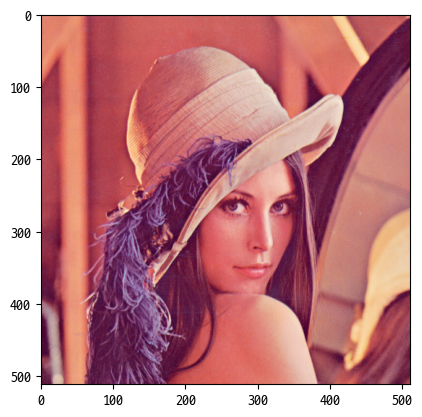

In [15]:
plt.imshow(lenna_rgb)
plt.show()

(512, 512)


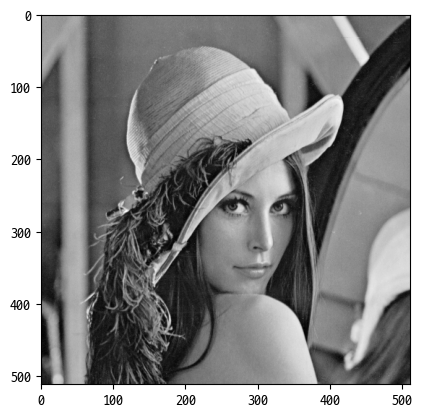

In [16]:
# BGR -> Grayscale
lenna_gray = cv2.cvtColor(lenna, cv2.COLOR_BGR2GRAY)
print(lenna_gray.shape)
plt.imshow(lenna_gray, cmap='gray')
plt.show()

## 채널 확인
- 채널별로 나눠 이미지 출력

In [17]:
lenna.shape
lenna_blue = lenna[:, :, 0]
lenna_green = lenna[:,:, 1]
lenna_red = lenna[:, : , 2]

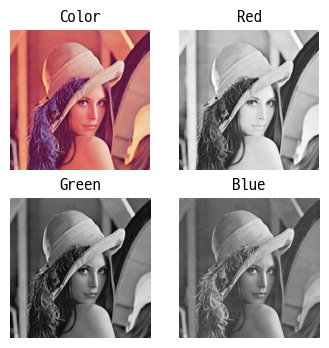

In [51]:
# RGB로 변환 후, 각 채널별로 분리
lenna_rgb = cv2.cvtColor(lenna, cv2.COLOR_BGR2RGB)
lenna_r = lenna_rgb[:, :, 0]
lenna_g = lenna_rgb[:, :, 1]
lenna_b = lenna_rgb[:, :, 2]

imgs = [lenna_rgb, lenna_r, lenna_g, lenna_b]
titles = ["Color", "Red", "Green", "Blue"]
fig, axes = plt.subplots(2, 2, figsize=(4, 4))

for idx, img in enumerate(imgs):
    ax = axes[idx//2][idx%2]
    ax.imshow(img, cmap="gray")
    ax.set_title(titles[idx])
    ax.axis("off")

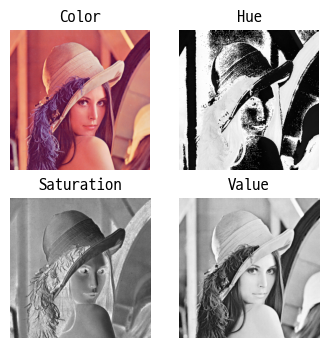

In [53]:
# HSV로 변환후 채널별로 출력
lenna_hsv = cv2.cvtColor(lenna, cv2.COLOR_BGR2HSV)
lenna_h = lenna_hsv[:, :, 0]
# # h 값 범위를 0~1로 변경
lenna_h = lenna_h / 180
lenna_s = lenna_hsv[:, :, 1]
lenna_v = lenna_hsv[:, :, 2]

imgs = [lenna_hsv, lenna_h, lenna_s, lenna_v]
titles = ["Color", "Hue", "Saturation", "Value"]
fig, axes = plt.subplots(2, 2, figsize=(4, 4))

for idx, img in enumerate(imgs):
    ax = axes[idx//2][idx%2]
    if idx == 0:
        ax.imshow(lenna_rgb, cmap="hsv")
    else:
        ax.imshow(img, cmap="gray")
    ax.set_title(titles[idx])
    ax.axis("off")

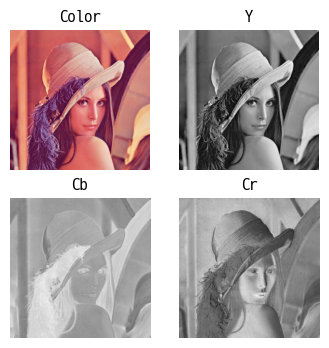

In [54]:
# YCrCb로 변환후 채널별로 출력
lenna_ycrcb = cv2.cvtColor(lenna, cv2.COLOR_BGR2YCrCb)
lenna_y = lenna_ycrcb[:, :, 0]
lenna_cr = lenna_ycrcb[:, :, 1]
lenna_cb = lenna_ycrcb[:, :, 2]

imgs = [lenna_ycrcb, lenna_y, lenna_cb, lenna_cr]
titles = ["Color", "Y", "Cb", "Cr"]
fig, axes = plt.subplots(2, 2, figsize=(4, 4))

for idx, img in enumerate(imgs):
    ax = axes[idx//2][idx%2]
    if idx == 0:
        ax.imshow(lenna_rgb, cmap="hsv")
    else:
        ax.imshow(img, cmap="gray")
    ax.set_title(titles[idx])
    ax.axis("off")

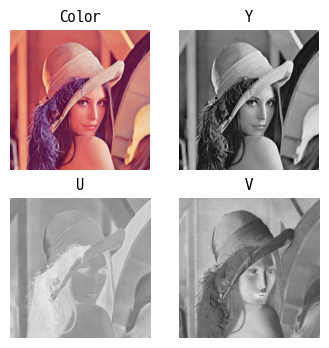

In [55]:
# YUV로 변환후 채널별로 출력
lenna_yuv = cv2.cvtColor(lenna, cv2.COLOR_BGR2YUV)
lenna_y = lenna_yuv[:, :, 0]
lenna_u = lenna_yuv[:, :, 1]
lenna_v = lenna_yuv[:, :, 2]

imgs = [lenna_yuv, lenna_y, lenna_u, lenna_v]
titles = ["Color", "Y", "U", "V"]
fig, axes = plt.subplots(2, 2, figsize=(4, 4))

for idx, img in enumerate(imgs):
    ax = axes[idx//2][idx%2]
    if idx == 0:
        ax.imshow(lenna_rgb, cmap="hsv")
    else:
        ax.imshow(img, cmap="gray")
    ax.set_title(titles[idx])
    ax.axis("off")

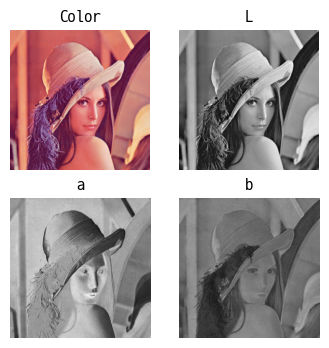

In [56]:
# Lab로 변환후 채널별로 출력
lenna_lab = cv2.cvtColor(lenna, cv2.COLOR_BGR2Lab)
lenna_l = lenna_lab[:, :, 0]
lenna_a = lenna_lab[:, :, 1]
lenna_b = lenna_lab[:, :, 2]

imgs = [lenna_lab, lenna_l, lenna_a, lenna_b]
titles = ["Color", "L", "a", "b"]
fig, axes = plt.subplots(2, 2, figsize=(4, 4))

for idx, img in enumerate(imgs):
    ax = axes[idx//2][idx%2]
    if idx == 0:
        ax.imshow(lenna_rgb, cmap="hsv")
    else:
        ax.imshow(img, cmap="gray")
    ax.set_title(titles[idx])
    ax.axis("off")

## cv2에서 이미지 출력
- **`cv2.imshow(winname, mat)`**
    - 창을 띄워 이미지를 출력한다.
    - winname: 창 이름
        - 창이름이 같으면 같은 창에 띄운다.
    - mat: 출력할 이미지(ndarray)
        - dtype이 uint8이어야 정상 출력된다. (float일 경우 255를 곱해서 출력한다.)
- **`cv2.imwrite(filename, img): bool`**
    - 이미지 파일로 저장
    - filename: 저장할 파일경로
    - img: 저장할 이미지(ndarray)

In [49]:
cv2.imshow("frame", lenna)
cv2.waitKey()
cv2.imshow("frame1", lenna_gray)
cv2.waitKey()
cv2.imshow("frame2", lenna_rgb)
cv2.waitKey()
cv2.destroyAllWindows()

In [33]:
# 특정 문자의 key를 입력했을때 종료
cv2.imshow("frame", lenna)
while True: 
#     if cv2.waitKey() == ord('q'):  # q입력시 종료. cv2.waitKey(): int -> 입력된 문자를 정수로 변환했을때 값을 반환.
    if cv2.waitKey() == 27:  # esc 입력시 종료.
        break
# 윈도우 종료
cv2.destroyAllWindows()

In [29]:
ord('q') #각 문자를 10진수로 변환했을때 값

113

In [30]:
ord('가')

44032

In [40]:
# 파일로 출력(저장)
import os
os.makedirs("output", exist_ok=True)

cv2.imwrite("output/lenna_gray.jpg", lenna_gray)
cv2.imwrite('output/lenna_rgb.jpg', lenna_rgb)
cv2.imwrite('output/lenna_copy.jpg', lenna)

True

# 동영상 처리

## 동영상 읽기
- VideoCapture 클래스사용
    - 객체 생성
        - VideoCapture('동영상파일 경로'): 동영상파일
        - VideoCapture(웹캠 ID): 웹캠
- VideoCapture의 주요 메소드
    - isOpened(): bool
        - 입력 대상과 연결되었는지 여부반환
    - read(): (bool, img)
        - Frame 이미지로 읽기
        - 반환값
            - bool: 읽었는지 여부
            - img: 읽은 이미지(ndarray)

### 동영상파일

FPS (Frame Per Second) - 1초에 몇 Frame을 보여주는지. 동영상 파일에 설정되있다.   
동영상파일의 FPS에 맞춰서(속도를 맞춰서) 플레이 하려면 한 Frame을 보여주고 FPS 맞는 시간간격만큼 기다려야 한다.
- 기다리는 시간: 초/FPS


In [65]:
# frame을 받아서, HSV로 변환후, 대비를 증가시킨 이미지를 반환하는 함수
def increase_contrast(frame, scale=1.5):
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v = cv2.multiply(v, scale)
    v = cv2.min(v, 255)
    hsv = cv2.merge((h, s, v))
    frame = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return frame

In [68]:
# frame을 받아서, HSV로 변환후, 채도를 scale만큼 곱한 이미지를 반환하는 함수
def increase_saturation(frame, scale=1.5):
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    s = cv2.multiply(s, scale)
    s = cv2.min(s, 255)
    hsv = cv2.merge((h, s, v))
    frame = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return frame

In [133]:
def increase_contrast2(frame, scale = 1.2):
    a = scale - 1
    # HSV로 변환
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    v = hsv[:,:,2]
    # frame = (1 + scale) * frame - (128 * scale)
    v = (1 + a) * v - (128 * a)
    # 255보다 큰 값은 255로 지정
    v[v > 255] = 255
    # 0보다 작은 값은 0으로 지정
    v[v < 0] = 0
    # 변겨된 v를 다시 hsv에 넣어줌
    hsv[:,:,2] = v
    # HSV를 BGR로 변환
    frame = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    # 명암비를 조절한 frame을 반환
    return frame

In [134]:
import cv2
import time

# 동영상 파일 읽기
cap = cv2.VideoCapture("./images/wave.mp4")
print(cap.isOpened())   # 파일이 정상적으로 열렸는지 확인

if cap.isOpened() == False:
    print("Error opening video stream or file")
    exit(1)
    
# 초당 프레임 수
fps = cap.get(cv2.CAP_PROP_FPS)
delay = int(1000/fps)
print(fps)
frame_time = None

while True:
    s_time = time.time()
    
    # 프레임 읽기
    ret, frame = cap.read()
    if ret == False:
        print("읽기 실패 또는 동영상 파일의 끝까지 읽었음")
        break
    
    # FPS값만큼 대기
    cv2.waitKey(int(delay * 0.5))
    
    # frame = increase_contrast(frame, 1.3)
    frame = increase_contrast2(frame, 1.3)
    frame = increase_saturation(frame, 2.5)

    # 동영상 파일에서 읽은 프레임을 윈도우에 출력
    cv2.imshow('Frame', frame)
    
    e_time = time.time()
    frame_time = e_time - s_time
    # 현재 초당 프레임 수를 계산
    now_fps = 1 / frame_time
    # 현재 실제 초당 프레임 수를 윈도우 타이틀에 출력
    cv2.setWindowTitle('Frame', str(now_fps))
    
    # esc를 누르면 종료
    if cv2.waitKey(1) == 27:
        break
    
# 윈도우 종료
cap.release()
cv2.destroyAllWindows()

True
29.97002997002997


#### 웹캠

In [8]:
import cv2

#1. VideoCapture 객체 생성. 
## 웹캠: 정수-카메라 ID, 문자열-파일명
cap = cv2.VideoCapture(0)
print(cap.isOpened())
if cap.isOpened() == False: #연결 실패.
    print("연결 실패")
    exit(1)  # 프로그램을 강제로 종료

while True:
    succ, img = cap.read() # 한 Frame 읽기. 반환값: (읽기 성공 여부,   ndarray)
    if succ == False:
        print("읽기 실패")
        break
       
    # 영상 출력전 처리. 1. 컬러->흑백, 2. 반전
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.flip(img, 1)  # 반전. 양수-수평, 0-수직, 음수-수평+수직
    
    cv2.imshow("frame", img)
    
    if cv2.waitKey(1) == 27:  # esc를 누르면 끝내기.  1/1000
        break
    
# 웹캠 연결 끊기.
cap.release()
cv2.destroyAllWindows()
# print(cap.isOpened())

True


# TODO: 웹캠에서 입력된 이미지를 화면에 보여주면서 파일로 저장
- 30장당 한장씩 저장한다.
- 파일형식: output_capture/cap_번호.jpg 

In [9]:
"6".zfill(2), "12".zfill(2)

('06', '12')

In [19]:
import cv2
import os

save_dir = 'output_capture'
os.makedirs(save_dir, exist_ok=True)

cap = cv2.VideoCapture(0)

cnt = 0
while cap.isOpened():
    
    succ, img = cap.read()
    
    if succ == False:
        print("캡쳐 실패")
        break
            
    # 파일저장. 30 frame당 한장씩 저장.
    if cnt % 30 == 0:
#         path = os.path.join(save_dir, "cap_"+str(cnt).zfill(3)+".jpg")
        path = os.path.join(save_dir, f"cap_{cnt:03d}.jpg")
        cv2.imwrite(path, img)
        
    cv2.imshow("frame", img)
    cnt += 1 # cnt 1증가.
    
    if cv2.waitKey(1) == 27:
        break
        
cap.release()
cv2.destroyAllWindows()

In [14]:
cnt = 920
"cap_"+str(cnt).zfill(3)+".jpg"

'cap_920.jpg'

In [18]:
cnt = 12
f"cap_{cnt:03d}.jpg"

'cap_012.jpg'

### 동영상 저장
- capture(read)한 이미지 프레임을 연속적으로 저장하면 동영상 저장이 된다.
- VideoWriter 객체를 이용해 저장
    - **`VideoWriter(filename, codec, fps, size)`**
        - filename: 저장경로
        - codec
            - VideoWriter_fourcc 이용
            
            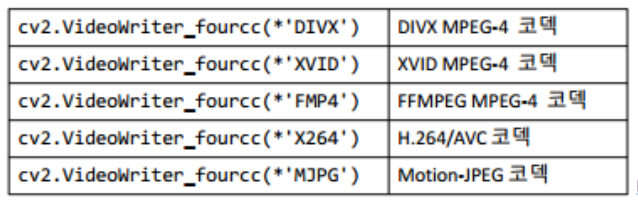
        - fps
            - FPS (Frame Per Second) - 초당 몇 프레임인지 지정
        - size
            - 저장할 frame 크기로 원본 동영상이나 웹캠의 width, height 순서로 넣는다.
    - `VideoWriter().write(img)`
        - Frame 저장

In [103]:
import cv2
import time

# 동영상 파일 읽기
cap = cv2.VideoCapture("./images/wave.mp4")
print(cap.isOpened())   # 파일이 정상적으로 열렸는지 확인

HD = (1280, 720)
# wrt = cv2.VideoWriter('./output/wave.mp4', cv2.VideoWriter_fourcc(*'FMP4'), 30, HD)
# wrt = cv2.VideoWriter('./output/wave.avi', cv2.VideoWriter_fourcc(*'XVID'), 30, HD)
# mp4
wrt = cv2.VideoWriter('./output/wave.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 30, HD)

if cap.isOpened() == False:
    print("Error opening video stream or file")
    exit(1)
    
# 초당 프레임 수
fps = cap.get(cv2.CAP_PROP_FPS)
delay = int(1000/fps)
print(fps)
frame_time = None

while True:
    s_time = time.time()
    
    # 프레임 읽기
    ret, frame = cap.read()
    if ret == False:
        print("읽기 실패 또는 동영상 파일의 끝까지 읽었음")
        break
    
    # FPS값만큼 대기
    # cv2.waitKey(int(delay * 0.5))
    
    frame = increase_contrast(frame, 1.3)
    frame = increase_saturation(frame, 2.5)

    # 동영상 파일에서 읽은 프레임을 윈도우에 출력
    cv2.imshow('Frame', frame)
    
    e_time = time.time()
    frame_time = e_time - s_time
    # 현재 초당 프레임 수를 계산
    now_fps = 1 / frame_time
    # 현재 실제 초당 프레임 수를 윈도우 타이틀에 출력
    cv2.setWindowTitle('Frame', str(now_fps))
    
    # 동영상 파일에 프레임 저장
    wrt.write(frame)
    
    # esc를 누르면 종료
    if cv2.waitKey(1) == 27:
        break
    
# 윈도우 종료
cap.release()
# 동영상 파일 저장 종료
wrt.release()

cv2.destroyAllWindows()

True
29.97002997002997
읽기 실패 또는 동영상 파일의 끝까지 읽었음


In [118]:
def ext_to_args(ext='mp4', resolution=(1280, 720), fps=30):
    coddec_dict = {
        'mp4': cv2.VideoWriter_fourcc(*'mp4v'),
        'avi': cv2.VideoWriter_fourcc(*'XVID'),
        'wmv': cv2.VideoWriter_fourcc(*'WMV1'),
        'mkv': cv2.VideoWriter_fourcc(*'X264'),
        'flv': cv2.VideoWriter_fourcc(*'FLV1'),
        'mpeg': cv2.VideoWriter_fourcc(*'MJPG'),
    }
    if coddec_dict.get(ext) is None:
        raise ValueError(f'지원하지 않는 확장자입니다. {ext}')
    
    return coddec_dict[ext], fps, resolution

In [122]:
res_16_9 = {
    '480p': (640, 480),
    '720p': (1280, 720),
    '1080p': (1920, 1080),
    '1440p': (2560, 1440),
    '4k': (3840, 2160),
    'HD': (1280, 720),
    'FHD': (1920, 1080),
    'QHD': (2560, 1440),
    'UHD': (3840, 2160),
}

In [120]:
# 웹캠으로 동영상 파일 저장 -> 원본, 후처리
import cv2
import datetime

# 웹캠 연결
cap = cv2.VideoCapture(0)

# 현재 날짜와 시간을 이용해서 파일명 생성
now = datetime.datetime.now().strftime("%y%m%d_%H%M%S")
ext = 'wmv'
fime_name = './output/webcam_{time}_{ori}.{ext}'.format(time=now, ori='{ori}', ext=ext)
wrt_args = ext_to_args(ext=ext, resolution=res_16_9['FHD'], fps=30)

wrts = {}
for wrt_name in ['orig', 'rtch']:
    wrts[wrt_name] = cv2.VideoWriter(fime_name.format(ori=wrt_name), *wrt_args)

if cap.isOpened() == False:
    print("카메라 연결 실패")
    exit(1)
print("카메라 연결 성공")

while True:
    succ, frame = cap.read()
    if succ == False:
        print("카메라 읽기 실패")
        break
    # frame  후처리
    frame = cv2.flip(frame, 1)
    # 원본 저장
    wrts['orig'].write(frame)
    # 후처리 후 저장
    frame = increase_contrast(frame, 1.3)
    frame = increase_saturation(frame, 1.5)
    wrts['rtch'].write(frame)
    # 화면 출력
    cv2.imshow("frame", frame)
    # esc를 누르면 종료
    if cv2.waitKey(1) == 27:
        break
# 웹캠 연결 종료, 동영상 파일 저장 종료
cap.release()
for wrt in wrts.values():
    wrt.release()
cv2.destroyAllWindows()
print("프로그램 종료")

카메라 연결 성공
프로그램 종료


In [106]:
now = datetime.datetime.now().strftime("%y%m%d_%H%M%S")
now

'230530_105015'